In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns 
from scipy import stats
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier



In [2]:

shill_df = pd.read_csv(r'C:\Users\zoice\Downloads\Shill Bidding Dataset.csv')
ebay_df = pd.read_csv(r'C:\Users\zoice\Downloads\eBay_Auction_Data.csv')

In [3]:
shill_df.head(10)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


In [4]:
shill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [5]:
ebay_df.head(10)

,Starting_Price,Number_of_Bidders,Auction_Duration_Days,Bidder_Activity,Final_Price
0,55.33,18,2,2.450,60.73
1,71.80,7,11,0.827,94.44
2,60.67,11,9,3.244,87.54
3,54.94,6,14,2.058,67.31
4,42.94,5,11,2.057,59.19
5,64.94,5,7,0.929,70.15
6,44.32,19,11,2.108,61.45
7,89.29,19,4,2.465,94.88
8,96.40,11,12,1.079,118.54
9,38.96,12,13,5.581,58.84


In [6]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Starting_Price         1000 non-null   float64
 1   Number_of_Bidders      1000 non-null   int64  
 2   Auction_Duration_Days  1000 non-null   int64  
 3   Bidder_Activity        1000 non-null   float64
 4   Final_Price            1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


## Perform an exploratory data analysis (EDA) on the provided shill bidding dataset. Identify missing values, outliers, and conduct necessary data preprocessing steps. Visualize key characteristics such as Bidder Tendency, Bidding Ratio, and Auction Bids to understand their distributions and impact on auction outcomes

In [7]:
shill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


There are no null values in the dataset. All columns are either floats or integers

In [8]:
shill_df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [9]:
#convert the ID columns to strings

shill_df['Record_ID'] = shill_df['Record_ID'].astype(str)

shill_df['Auction_ID'] = shill_df['Auction_ID'].astype(str)

In [10]:
shill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   object 
 1   Auction_ID              6321 non-null   object 
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 642.1+ KB


In [11]:
#descriptive statistics

shill_df.describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


C:\Users\zoice\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
C:\Users\zoice\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


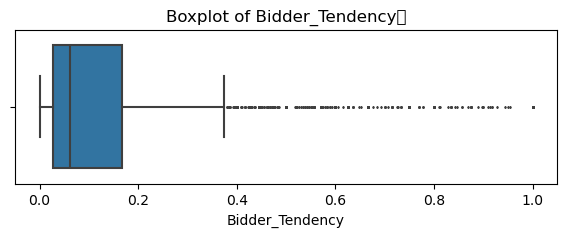

In [12]:
#Checking for outliers in Biddder_tendency

# Create box plot of Bidder_Tendency	
plt.figure(figsize=(7,2))
plt.title('Boxplot of Bidder_Tendency	')
sns.boxplot(data=None, x=shill_df['Bidder_Tendency'], fliersize=1);

In [13]:
#values over 3 z scores from the mean can be considered an outlier
mean = 0.142541
std = 0.197084
three_z_score = mean + (std * 3)
print ("3z score of bidder tendency is:",  three_z_score)

3z score of bidder tendency is: 0.733793


In [14]:
#Any value over 0.73 may be considered an outlier, let us check out these values
shill_df [shill_df['Bidder_Tendency'] > 0.73]


,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
26,73,1968,9***r,1.00,0.600000,0.5,0.000201,0.000000,0.000000,0.000049,0.0,5,0
29,90,1847,9***m,1.00,0.090909,0.5,0.930026,0.454545,0.000000,0.929990,0.0,7,0
71,194,995,p***u,0.75,0.073171,0.5,0.941620,0.560976,0.993593,0.941397,0.0,3,1
76,203,352,-***w,1.00,0.235294,0.0,0.945521,0.000000,0.993593,0.945436,1.0,3,0
86,224,870,c***m,0.75,0.065217,0.0,0.875046,0.608696,0.999353,0.875046,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,14910,1142,h***7,0.75,0.187500,0.0,0.023214,0.000000,0.000000,0.023214,0.5,3,0
6237,14934,1527,v***1,1.00,0.800000,1.0,0.140651,0.000000,0.000000,0.140632,1.0,7,1
6263,14986,1923,r***v,0.75,0.136364,0.5,0.274079,0.181818,0.000000,0.274069,1.0,7,1
6270,15004,192,-***n,1.00,0.100000,0.0,0.878921,0.640000,0.993593,0.625935,1.0,5,0


In [15]:
shill_df1 = shill_df [shill_df['Bidder_Tendency'] < 0.73]

shill_df1

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


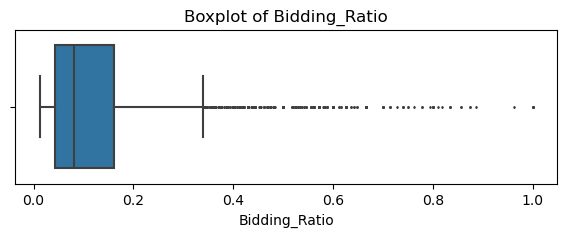

In [16]:
#Checking for outliers

# Create box plot of Bidding_Ratio	
plt.figure(figsize=(7,2))
plt.title('Boxplot of Bidding_Ratio')
sns.boxplot(data=None, x=shill_df1['Bidding_Ratio'], fliersize=1);

In [17]:
mean = 0.127670
std = 0.131530
three_z_score = mean + (std * 3)
print ("three_z score of Bidding Ratio is:",  three_z_score)

three_z score of Bidding Ratio is: 0.52226


In [18]:
#Any value over 0.52226 may be considered an outlier, let us check out these values
shill_df1 [shill_df1['Bidding_Ratio'] > 0.52226]

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
10,37,2172,o***u,0.600000,0.562500,1.0,0.457631,0.000000,0.000000,0.457474,0.600000,7,1
23,68,432,0***0,0.111111,0.714286,0.5,0.055501,0.000000,0.000000,0.053763,0.818182,7,1
37,114,547,w***n,0.571429,0.666667,0.5,0.001976,0.000000,0.000000,0.001976,1.000000,7,1
116,316,1141,u***_,0.424242,0.666667,1.0,0.906998,0.142857,0.000000,0.700131,0.800000,3,1
231,547,1367,v***u,0.333333,0.625000,1.0,0.298087,0.000000,0.000000,0.258152,0.500000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,14054,2125,j***j,0.321429,0.529412,1.0,0.483175,0.000000,0.000000,0.332465,0.714286,3,1
6041,14460,2278,s***n,0.423529,0.580645,1.0,0.785103,0.709677,0.999935,0.784929,0.935484,7,1
6100,14594,1498,z***y,0.526316,0.526316,1.0,0.696648,0.052632,0.967705,0.696644,1.000000,7,1
6285,15052,2378,n***e,0.281690,0.740741,1.0,0.651391,0.333333,0.993593,0.651339,1.000000,7,1


In [19]:
shill_df1 = shill_df1 [shill_df1['Bidding_Ratio'] < 0.52226]

shill_df1

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


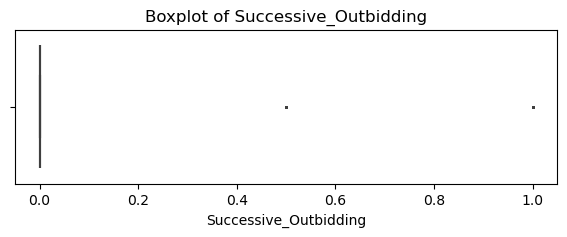

In [20]:
#Checking for outliers

# Create box plot of Successive_Outbidding	
plt.figure(figsize=(7,2))
plt.title('Boxplot of Successive_Outbidding')
sns.boxplot(data=None, x=shill_df1['Successive_Outbidding'], fliersize=1);

In [21]:
mean = 0.12
std = 0.3
three_z_score = mean + (std * 3)
print ("three z score of Successive_Outbidding is:", three_z_score)

three z score of Successive_Outbidding is: 1.02


In [22]:
#Any value over 1.02 may be considered an outlier, let us check out these values
shill_df1 [shill_df1['Bidding_Ratio'] > 1.02]

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class


Mean is 0.14. The higher the bidder tendency, the higher the chance of fraudulent behaviour

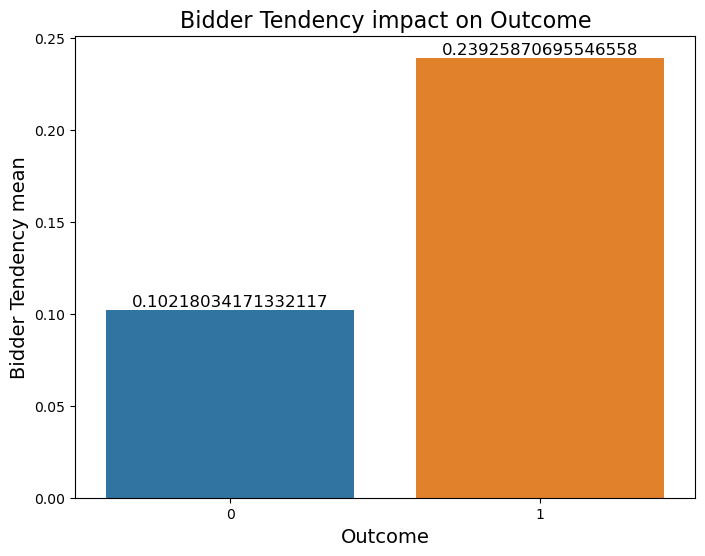

In [23]:
bidder_tendency_outcome = shill_df1.groupby('Class')['Bidder_Tendency'].mean()

# Create a bar plot of auction_bidder_tendency
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=bidder_tendency_outcome.index, y=bidder_tendency_outcome.values)

# Add count numbers to the bars
for i, v in enumerate(bidder_tendency_outcome.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.title('Bidder Tendency impact on Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Bidder Tendency mean', fontsize=14)
plt.show()

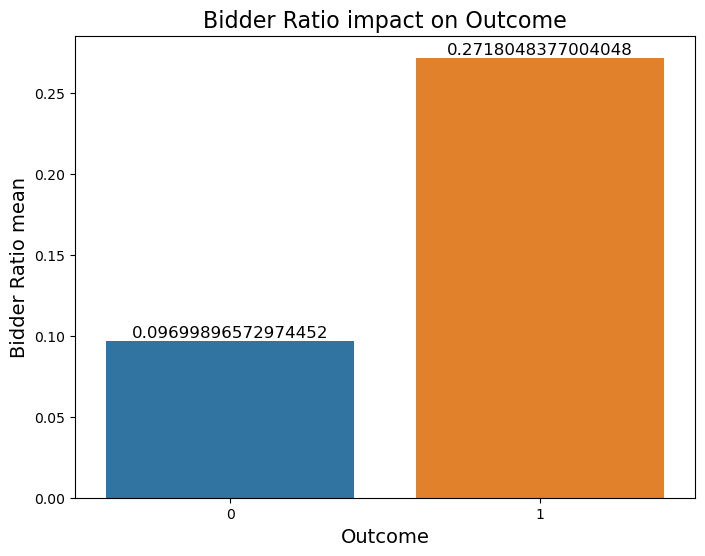

In [25]:
Bidding_Ratio_outcome = shill_df1.groupby('Class')['Bidding_Ratio'].mean()

# Create a bar plot of auction_bidder_tendency
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=Bidding_Ratio_outcome.index, y=Bidding_Ratio_outcome.values)

# Add count numbers to the bars
for i, v in enumerate(Bidding_Ratio_outcome.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.title('Bidder Ratio impact on Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Bidder Ratio mean', fontsize=14)
plt.show()

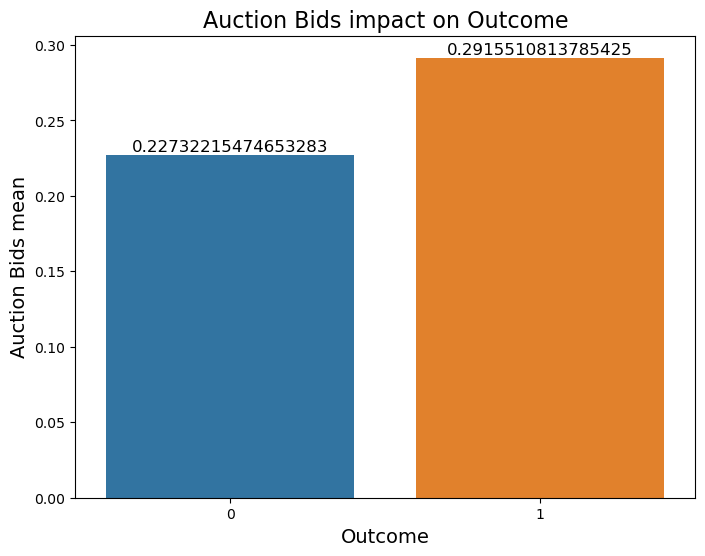

In [24]:
Auction_Bids_outcome = shill_df1.groupby('Class')['Auction_Bids'].mean()

# Create a bar plot of auction_bidder_tendency
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=Auction_Bids_outcome.index, y=Auction_Bids_outcome.values)

# Add count numbers to the bars
for i, v in enumerate(Auction_Bids_outcome.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.title('Auction Bids impact on Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Auction Bids mean', fontsize=14)
plt.show()

High bidder tendency and Bidding ratio shows very great signs of fraudulent behaviour while for the plot of Action bids and Outcomr, there isn't a very great disparity between fraudulent behaviour and normal behaviour.

Text(0.5, 1.0, 'Correlation Heatmap')

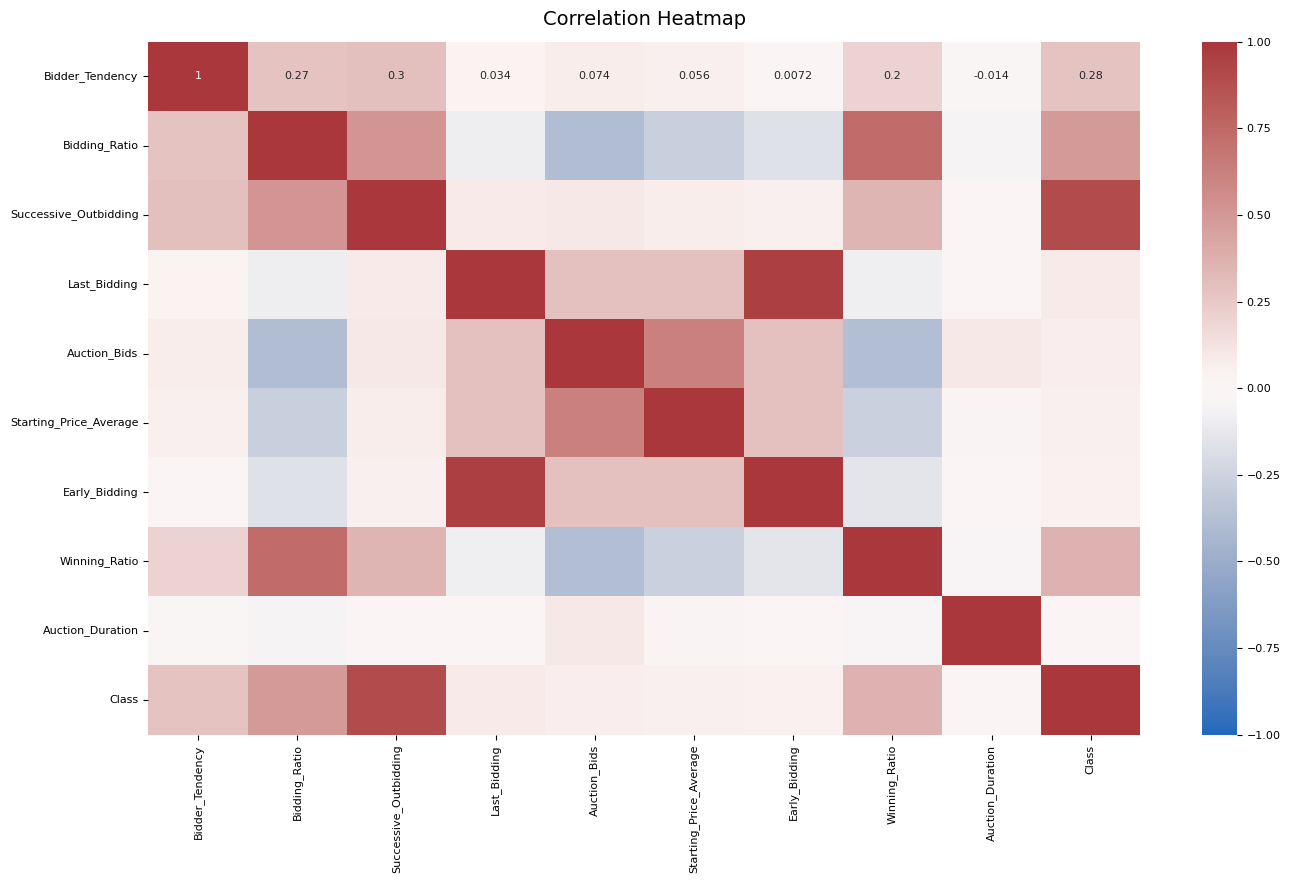

In [27]:
# Select only numeric columns
numeric_columns = shill_df1.select_dtypes(include='number')

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

bidding ratio, winning  ratio and successive outbidding seem to be highly correlated 
Last bidding and early bidding are highly correlated
Auction bids and starting price average are highly correlated

## Develop two classification models to predict whether a bid is normal or indicative of shill bidding. Compare the performance of these models and select the best one based on accuracy and other relevant metrics.

In [28]:
shill_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               5974 non-null   object 
 1   Auction_ID              5974 non-null   object 
 2   Bidder_ID               5974 non-null   object 
 3   Bidder_Tendency         5974 non-null   float64
 4   Bidding_Ratio           5974 non-null   float64
 5   Successive_Outbidding   5974 non-null   float64
 6   Last_Bidding            5974 non-null   float64
 7   Auction_Bids            5974 non-null   float64
 8   Starting_Price_Average  5974 non-null   float64
 9   Early_Bidding           5974 non-null   float64
 10  Winning_Ratio           5974 non-null   float64
 11  Auction_Duration        5974 non-null   int64  
 12  Class                   5974 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 653.4+ KB


In [29]:
#Drop the non - numeric columns
shill_df2 = shill_df1.drop(['Record_ID', 'Auction_ID', 'Bidder_ID'], axis=1)
shill_df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6320
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bidder_Tendency         5974 non-null   float64
 1   Bidding_Ratio           5974 non-null   float64
 2   Successive_Outbidding   5974 non-null   float64
 3   Last_Bidding            5974 non-null   float64
 4   Auction_Bids            5974 non-null   float64
 5   Starting_Price_Average  5974 non-null   float64
 6   Early_Bidding           5974 non-null   float64
 7   Winning_Ratio           5974 non-null   float64
 8   Auction_Duration        5974 non-null   int64  
 9   Class                   5974 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 513.4 KB


In [30]:
# Isolate target variable (y)
y = shill_df2['Class']

# Isolate the features (X)
X = shill_df2.drop('Class', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Build  Decision tree model

In [31]:
#Decision Tree model

from sklearn.tree import DecisionTreeClassifier

# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[6, 8],
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 4]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [32]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 531 ms
Wall time: 539 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'accuracy', 'roc_auc'})

In [33]:
# Check best parameters
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [34]:
# Check best AUC score on CV
tree1.best_score_

0.9994905767738825

This is an extremely strong auc score

In [35]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [36]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.956189,0.978319,0.966578,0.99442,0.999491


# Build a random forest model

In [37]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5], 
             'max_features': [0.7, 1.0],
             'max_samples': [0.8, 1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [38]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 6min
Wall time: 6min 5s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [0.7, 1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'accuracy', 'roc_auc'})

In [39]:
# Examine best score
rf1.best_score_

0.9998774582002856

In [40]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [41]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.956189  0.978319  0.966578   0.99442  0.999491
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.997093  0.959385  0.977775  0.996429  0.999877


# The evaluation scores are quite high and skeptical as this might indicate that we have used several features that are highly correlated. we will carry out feature engineering to construct a better model


# Feature Engineering

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(shill_df2.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);


bidding ratio, winning  ratio and successive outbidding, Last bidding and early bidding, Auction bids and starting price average
appear to be highly correlated

In [44]:
#We will engineer a new column called "Effective bidding ratio" This will be the ration of bidding ratio to winning ratio, the higher this ratio, 
#the higher the chance of fraudulent behaviour 

shill_df3 = shill_df2.copy()
shill_df3["Effective_bidding"] = shill_df3["Winning_Ratio"]/shill_df3["Bidding_Ratio"]

shill_df3["Effective_bidding"] = shill_df3["Effective_bidding"].round(2)


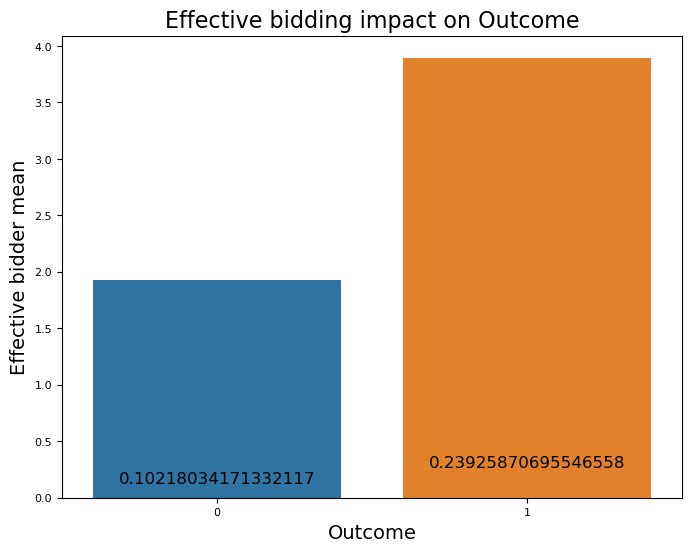

In [45]:
#a barplot to know the impact of the new column (Effective_bidding) on outcome
effective_bidding_outcome = shill_df3.groupby('Class')['Effective_bidding'].mean()

# Create a bar plot of effective_bidding_outcome
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=effective_bidding_outcome.index, y=effective_bidding_outcome.values)

# Add count numbers to the bars
for i, v in enumerate(bidder_tendency_outcome.values):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)

plt.title('Effective bidding impact on Outcome', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Effective bidder mean', fontsize=14)
plt.show()

the above shows that the higher the effective bidding value, the higher the chancce of fraud

In [46]:
#then drop bidding ratio and winnong ratio
shill_df3 = shill_df3.drop(["Bidding_Ratio","Winning_Ratio"], axis=1)

shill_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6320
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bidder_Tendency         5974 non-null   float64
 1   Successive_Outbidding   5974 non-null   float64
 2   Last_Bidding            5974 non-null   float64
 3   Auction_Bids            5974 non-null   float64
 4   Starting_Price_Average  5974 non-null   float64
 5   Early_Bidding           5974 non-null   float64
 6   Auction_Duration        5974 non-null   int64  
 7   Class                   5974 non-null   int64  
 8   Effective_bidding       5974 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 466.7 KB


In [47]:
shill_df3.head()

,Bidder_Tendency,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Auction_Duration,Class,Effective_bidding
0,0.200000,0.0,0.000028,0.0,0.993593,0.000028,5,0,1.67
1,0.024390,0.0,0.013123,0.0,0.993593,0.013123,5,0,4.72
2,0.142857,0.0,0.003042,0.0,0.993593,0.003042,5,0,5.00
3,0.100000,0.0,0.097477,0.0,0.993593,0.097477,5,0,5.00
4,0.051282,0.0,0.001318,0.0,0.000000,0.001242,7,0,2.25


Auction bids and starting price are highly correlate because if starting price is low, this wil indicate that there will be more bids, so we will pick 
just one. we have decided to pick Auction_bids and drop starting price average

In [48]:


# Drop starting price average
shill_df3 = shill_df3.drop('Starting_Price_Average', axis=1)

shill_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6320
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bidder_Tendency        5974 non-null   float64
 1   Successive_Outbidding  5974 non-null   float64
 2   Last_Bidding           5974 non-null   float64
 3   Auction_Bids           5974 non-null   float64
 4   Early_Bidding          5974 non-null   float64
 5   Auction_Duration       5974 non-null   int64  
 6   Class                  5974 non-null   int64  
 7   Effective_bidding      5974 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 420.0 KB


In [49]:
#Since last_bidding and early_bidding are highly correlated, we will make them into a new column which we will call "early-last bidding ratio" 
#and drop the two original columns

shill_df3["Early_last_bidding_ratio"] = shill_df3["Early_Bidding"]/shill_df3["Last_Bidding"]
shill_df3 = shill_df3.drop(["Early_Bidding","Last_Bidding"], axis=1)

shill_df3.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6320
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bidder_Tendency           5974 non-null   float64
 1   Successive_Outbidding     5974 non-null   float64
 2   Auction_Bids              5974 non-null   float64
 3   Auction_Duration          5974 non-null   int64  
 4   Class                     5974 non-null   int64  
 5   Effective_bidding         5974 non-null   float64
 6   Early_last_bidding_ratio  5966 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 373.4 KB


In [50]:
#drop null values
shill_df3 = shill_df3.dropna()

In [51]:
shill_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 0 to 6320
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bidder_Tendency           5966 non-null   float64
 1   Successive_Outbidding     5966 non-null   float64
 2   Auction_Bids              5966 non-null   float64
 3   Auction_Duration          5966 non-null   int64  
 4   Class                     5966 non-null   int64  
 5   Effective_bidding         5966 non-null   float64
 6   Early_last_bidding_ratio  5966 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 372.9 KB


In [52]:
# Isolate target variable (y)
y = shill_df3['Class']

# Isolate the features (X)
X = shill_df3.drop('Class', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Build a second decision tree

In [53]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[6, 8],
             'min_samples_leaf': [2, 5],
             'min_samples_split': [2, 4]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [54]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 1.09 s
Wall time: 1.11 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 4]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'accuracy', 'roc_auc'})

In [55]:
# Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [56]:
# Check best AUC score on CV
tree2.best_score_

0.9999512015552621

In [57]:
# Get all CV scores
tree2_cv_results = make_results('decision tree cv', tree2, 'auc')
tree2_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.969613,0.97569,0.971857,0.995307,0.999951


In [58]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5], 
             'max_features': [0.7, 1.0],
             'max_samples': [0.8, 1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
%%time
rf2.fit(X_train, y_train)

CPU times: total: 9min 57s
Wall time: 10min


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [0.7, 1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'accuracy', 'roc_auc'})

In [60]:
# Examine best score
rf2 .best_score_

0.9999551173919423

In [61]:
#Use the below get_test_scores() function you will use to output the scores of the model on the test data.

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [62]:
# Call 'make_results()' on the GridSearch object
rf2_cv_results = make_results('random forest cv', rf2, 'auc')
rf2_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,1.0,0.962161,0.980677,0.996871,0.999955


In [63]:
print(tree1_cv_results)
print(rf1_cv_results)
print(tree2_cv_results)
print(rf2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.956189  0.978319  0.966578   0.99442  0.999491
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.997093  0.959385  0.977775  0.996429  0.999877
              model  precision   recall        F1  accuracy       auc
0  decision tree cv   0.969613  0.97569  0.971857  0.995307  0.999951
              model  precision    recall        F1  accuracy       auc
0  random forest cv        1.0  0.962161  0.980677  0.996871  0.999955


# rf2 seems to have slightly better parameters than the others. let see if it works well on test data

In [64]:
# Get scores on test data
rf_preds = rf2.best_estimator_.predict(X_test)

In [65]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([rf2_cv_results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,1.0,0.962161,0.980677,0.996871,0.999955
0,RF test,1.0,0.959677,0.979424,0.996649,NaN


In [ ]:
#The model works well on test data

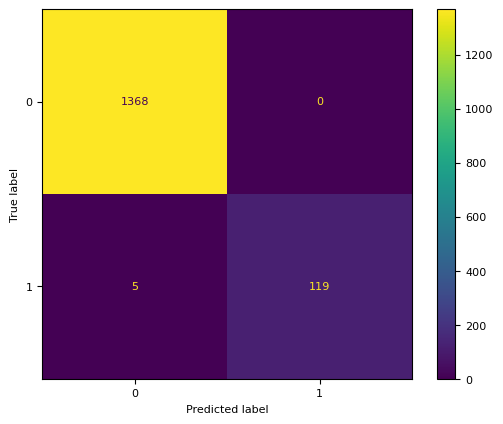

In [66]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_, 
                             )
disp.plot(values_format='');

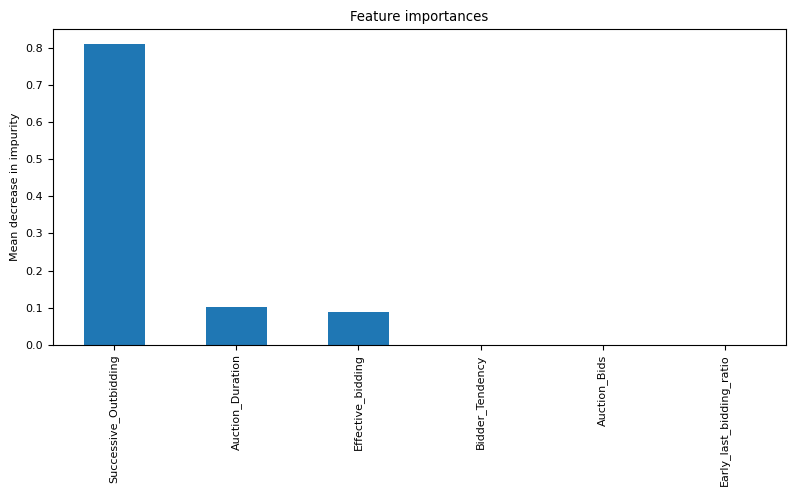

In [67]:
#Use the feature_importances_ attribute of the best estimator object to inspect the features of your final model.

importances = rf2.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

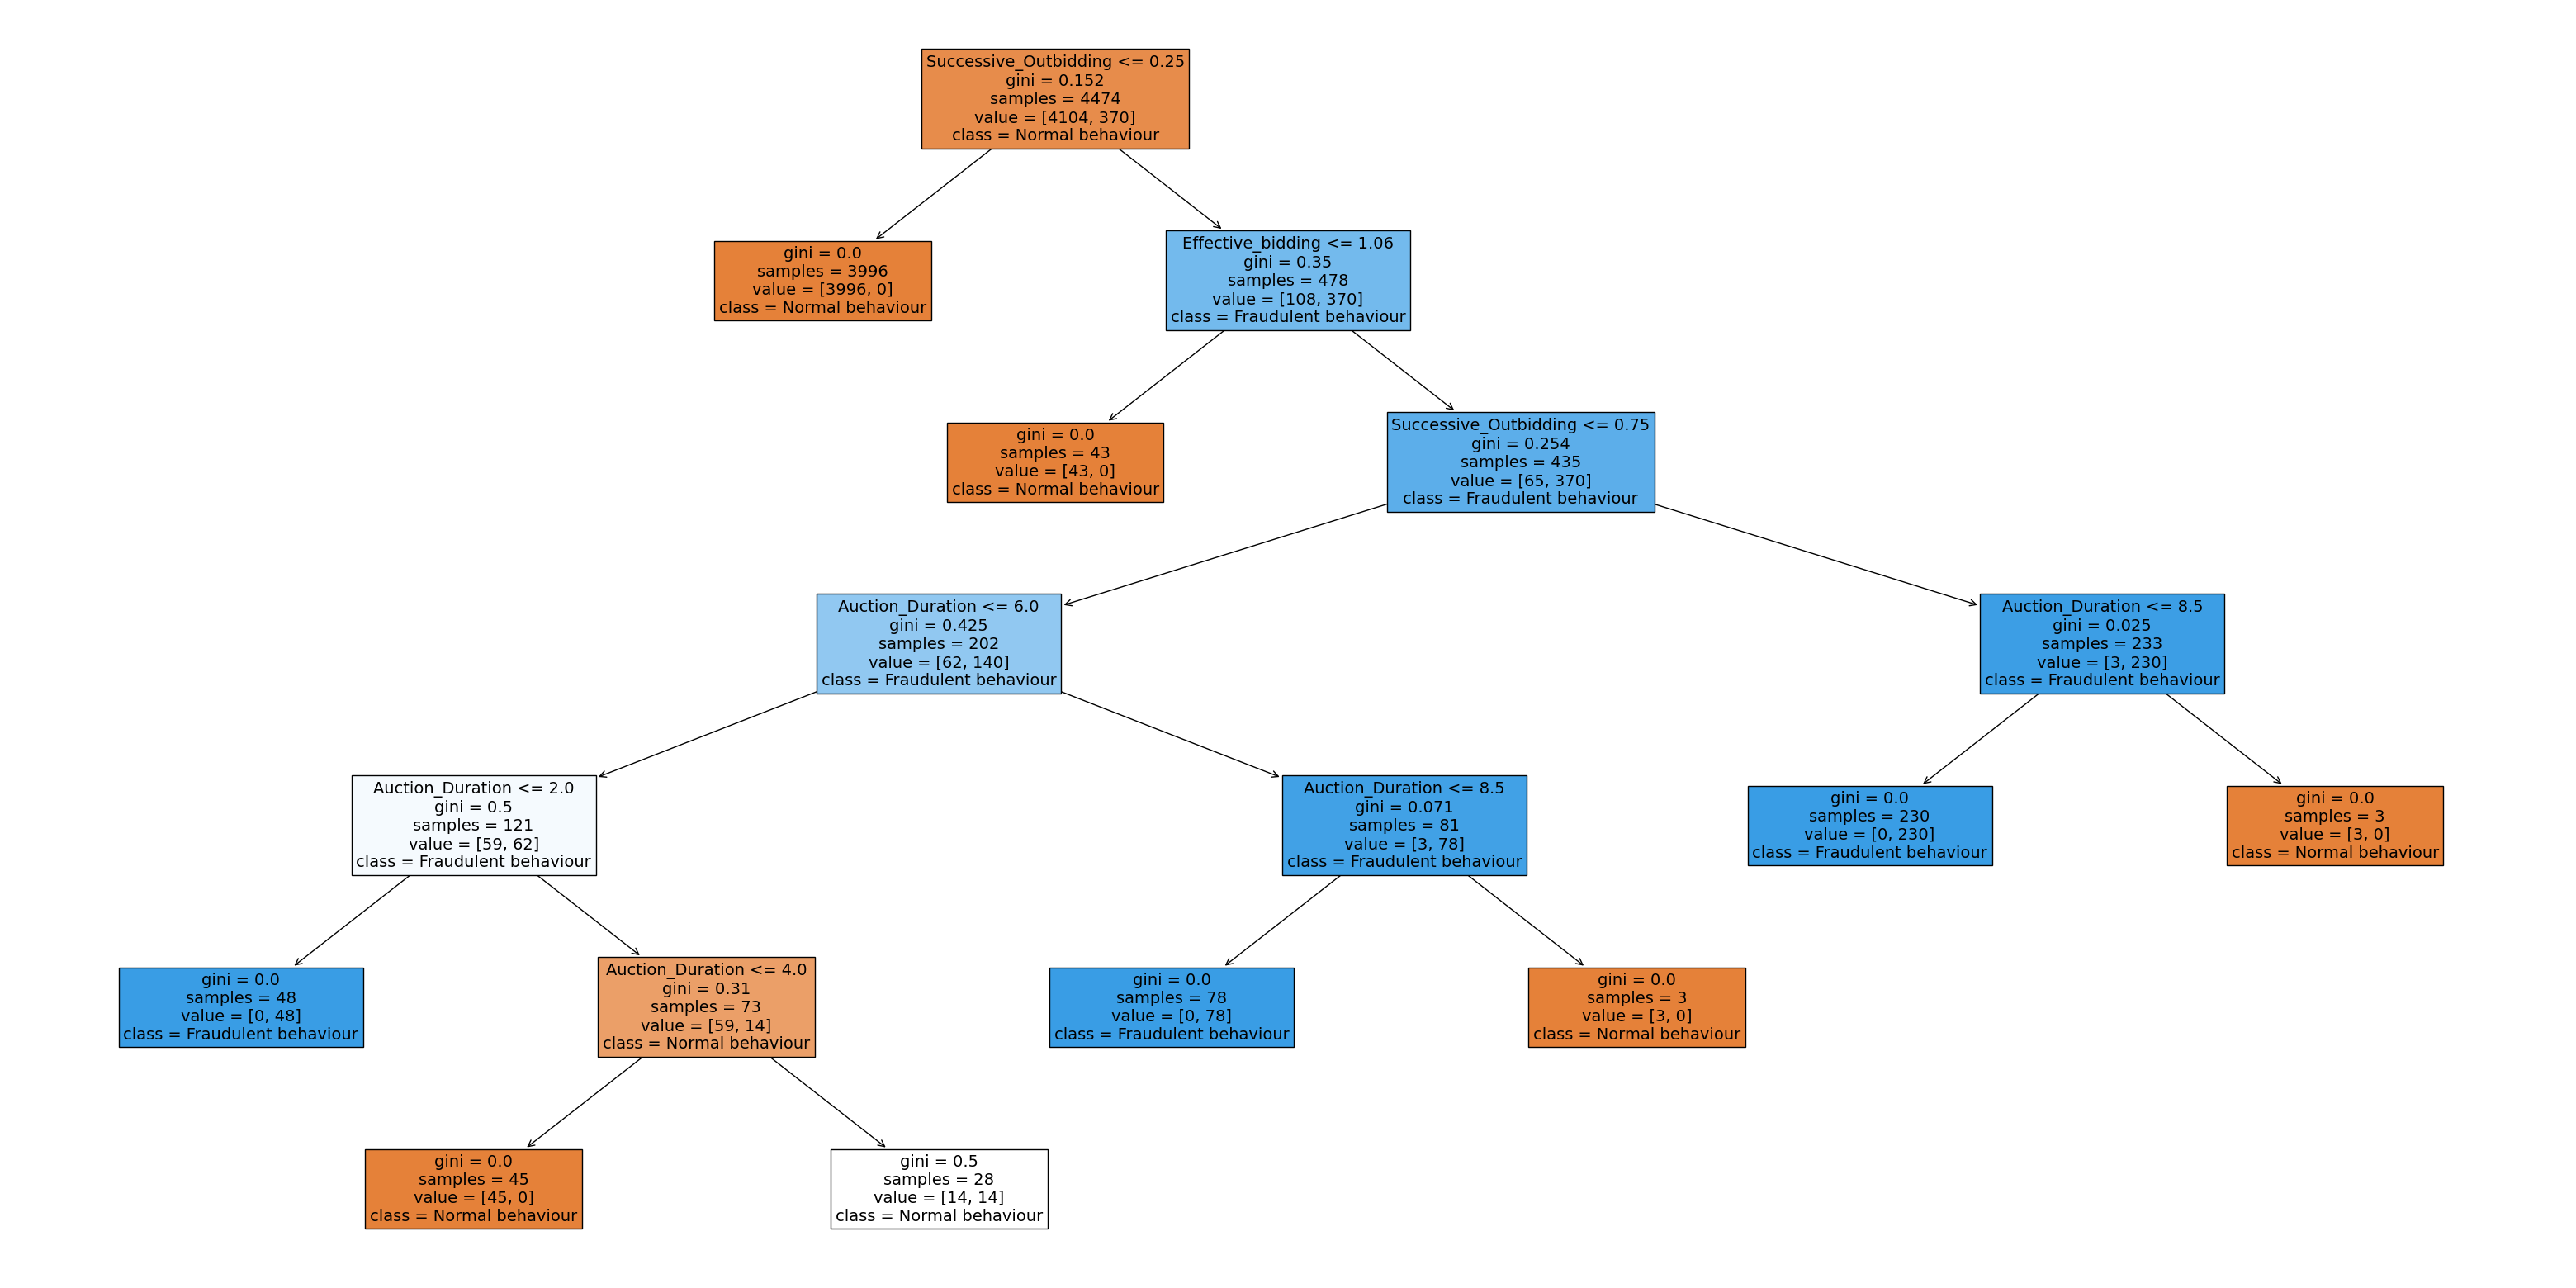

In [68]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(40,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'Normal behaviour', 1:'Fraudulent behaviour'}, filled=True);
plt.show()

In [69]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
Successive_Outbidding,0.797706
Auction_Duration,0.117123
Effective_bidding,0.085171


From the random Forest and decision tree models, a shill bidder outbidding themselves even though they are the current winner is the biggest indicator of fraudulent behaviour. If successive outbidding is more than 0.25 and the ratio between early bidding and last bidding is less than 1.07, this is an indication of rfraudulent behaviour.

## Apply a clustering algorithm to segment auctions based on bidding patterns and create classes of 
your choice. Use the outcome and develop one classification model afterwards. Make a prediction
and explain the results.

In [70]:
#Using the X dataframe from the previous model after feature engineering
X.head(10)

,Bidder_Tendency,Successive_Outbidding,Auction_Bids,Auction_Duration,Effective_bidding,Early_last_bidding_ratio
0,0.200000,0.0,0.000000,5,1.67,1.000000
1,0.024390,0.0,0.000000,5,4.72,1.000000
2,0.142857,0.0,0.000000,5,5.00,1.000000
3,0.100000,0.0,0.000000,5,5.00,1.000000
4,0.051282,0.0,0.000000,7,2.25,0.942284
5,0.038462,0.0,0.000000,7,7.20,1.000000
6,0.400000,0.0,0.000000,7,3.38,0.999025
7,0.137931,1.0,0.000000,7,2.25,0.021237
8,0.121951,1.0,0.333333,7,5.10,0.684245
9,0.155172,0.5,0.307692,7,1.77,0.724681


In [71]:

cluster_df = X.copy()

In [72]:
cluster_df.head()

,Bidder_Tendency,Successive_Outbidding,Auction_Bids,Auction_Duration,Effective_bidding,Early_last_bidding_ratio
0,0.200000,0.0,0.0,5,1.67,1.000000
1,0.024390,0.0,0.0,5,4.72,1.000000
2,0.142857,0.0,0.0,5,5.00,1.000000
3,0.100000,0.0,0.0,5,5.00,1.000000
4,0.051282,0.0,0.0,7,2.25,0.942284


In [73]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 0 to 6320
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bidder_Tendency           5966 non-null   float64
 1   Successive_Outbidding     5966 non-null   float64
 2   Auction_Bids              5966 non-null   float64
 3   Auction_Duration          5966 non-null   int64  
 4   Effective_bidding         5966 non-null   float64
 5   Early_last_bidding_ratio  5966 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 326.3 KB


In [74]:
cluster_df = cluster_df.dropna()

In [75]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 0 to 6320
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bidder_Tendency           5966 non-null   float64
 1   Successive_Outbidding     5966 non-null   float64
 2   Auction_Bids              5966 non-null   float64
 3   Auction_Duration          5966 non-null   int64  
 4   Effective_bidding         5966 non-null   float64
 5   Early_last_bidding_ratio  5966 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 326.3 KB


In [76]:
cluster_df.head()

,Bidder_Tendency,Successive_Outbidding,Auction_Bids,Auction_Duration,Effective_bidding,Early_last_bidding_ratio
0,0.200000,0.0,0.0,5,1.67,1.000000
1,0.024390,0.0,0.0,5,4.72,1.000000
2,0.142857,0.0,0.0,5,5.00,1.000000
3,0.100000,0.0,0.0,5,5.00,1.000000
4,0.051282,0.0,0.0,7,2.25,0.942284


In [ ]:
#rescaling the minimum and maximum

In [77]:
features = ['Bidder_Tendency', 'Successive_Outbidding', 'Auction_Bids', 
                   'Auction_Duration', 'Effective_bidding', 'Early_last_bidding_ratio']

In [78]:
#rescaling the minimum and maximum features before clustering

scaler = StandardScaler()

In [79]:
cluster_df[["Bidder_Tendency_scaled","Successive_Outbidding_scaled","Auction_Bids_scaled","Auction_Duration_scaled","Effective_bidding_scaled","Early_last_bidding_ratio_scaled"]]= scaler.fit_transform(cluster_df[["Bidder_Tendency","Successive_Outbidding","Auction_Bids","Auction_Duration","Effective_bidding","Early_last_bidding_ratio"]])

In [80]:
cluster_df.head()

,Bidder_Tendency,Successive_Outbidding,Auction_Bids,Auction_Duration,Effective_bidding,Early_last_bidding_ratio,Bidder_Tendency_scaled,Successive_Outbidding_scaled,Auction_Bids_scaled,Auction_Duration_scaled,Effective_bidding_scaled,Early_last_bidding_ratio_scaled
0,0.200000,0.0,0.0,5,1.67,1.000000,0.637603,-0.326264,-0.912313,0.161141,-0.146078,0.357394
1,0.024390,0.0,0.0,5,4.72,1.000000,-0.658573,-0.326264,-0.912313,0.161141,0.903674,0.357394
2,0.142857,0.0,0.0,5,5.00,1.000000,0.215831,-0.326264,-0.912313,0.161141,1.000045,0.357394
3,0.100000,0.0,0.0,5,5.00,1.000000,-0.100497,-0.326264,-0.912313,0.161141,1.000045,0.357394
4,0.051282,0.0,0.0,7,2.25,0.942284,-0.460085,-0.326264,-0.912313,0.970371,0.053547,0.119288


In [81]:
from sklearn.cluster import KMeans

def plot_elbow_method(cluster_df, max_k):
    """
    Plot the within-cluster sum of squares (WCSS) for different values of K
    to determine the appropriate number of clusters using the elbow method.

    Parameters:
    - cluster_df: DataFrame containing the features for clustering
    - max_k: Maximum number of clusters to test

    Returns:
    - None (plots the elbow curve)
    """
    # Extract the feature data from the DataFrame
    data = cluster_df.values

    wcss = []  # To store the within-cluster sum of squares

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  

    # Plotting the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(np.arange(1, max_k + 1))
    plt.grid(True)
    plt.show()

C:\Users\zoice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zoice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zoice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zoice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zoice\anaconda3\Lib\site-packages\sklearn\clust

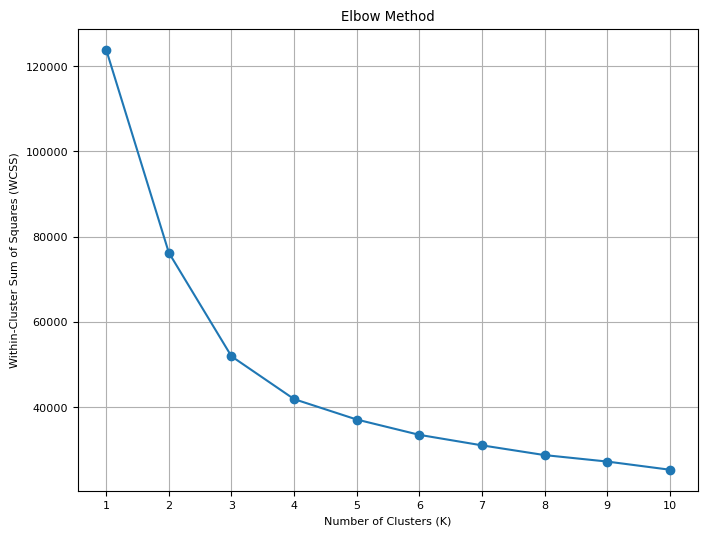

In [82]:
#using the elbow method to check for the appropraite number of clusters to use
plot_elbow_method(cluster_df, max_k=10)

The WCSS slowly reduces after k=2, we could have used either 2 or 3, but decided to use 2 as it fits better with our binary outcome from the original data.

In [83]:
kmeans = KMeans (n_clusters=2)

In [84]:
kmeans.fit(cluster_df)

C:\Users\zoice\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [85]:
cluster_df["Outcome"] = kmeans.labels_

In [86]:
cluster_df.head(10)

,Bidder_Tendency,Successive_Outbidding,Auction_Bids,Auction_Duration,Effective_bidding,Early_last_bidding_ratio,Bidder_Tendency_scaled,Successive_Outbidding_scaled,Auction_Bids_scaled,Auction_Duration_scaled,Effective_bidding_scaled,Early_last_bidding_ratio_scaled,Outcome
0,0.200000,0.0,0.000000,5,1.67,1.000000,0.637603,-0.326264,-0.912313,0.161141,-0.146078,0.357394,1
1,0.024390,0.0,0.000000,5,4.72,1.000000,-0.658573,-0.326264,-0.912313,0.161141,0.903674,0.357394,0
2,0.142857,0.0,0.000000,5,5.00,1.000000,0.215831,-0.326264,-0.912313,0.161141,1.000045,0.357394,0
3,0.100000,0.0,0.000000,5,5.00,1.000000,-0.100497,-0.326264,-0.912313,0.161141,1.000045,0.357394,0
4,0.051282,0.0,0.000000,7,2.25,0.942284,-0.460085,-0.326264,-0.912313,0.970371,0.053547,0.119288,1
5,0.038462,0.0,0.000000,7,7.20,1.000000,-0.554713,-0.326264,-0.912313,0.970371,1.757243,0.357394,0
6,0.400000,0.0,0.000000,7,3.38,0.999025,2.113804,-0.326264,-0.912313,0.970371,0.442471,0.353370,0
7,0.137931,1.0,0.000000,7,2.25,0.021237,0.179472,3.724707,-0.912313,0.970371,0.053547,-3.680441,1
8,0.121951,1.0,0.333333,7,5.10,0.684245,0.061525,3.724707,0.393922,0.970371,1.034463,-0.945236,0
9,0.155172,0.5,0.307692,7,1.77,0.724681,0.306730,1.699221,0.293442,0.970371,-0.111660,-0.778422,1


In [87]:
cluster_df["Outcome"].value_counts()

Outcome
1    3992
0    1974
Name: count, dtype: int64

In [ ]:
features = ['Bidder_Tendency', 'Successive_Outbidding', 'Auction_Bids', 
                   'Auction_Duration', 'Effective_bidding', 'Early_last_bidding_ratio

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5966 entries, 0 to 6320
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bidder_Tendency           5966 non-null   float64
 1   Successive_Outbidding     5966 non-null   float64
 2   Auction_Bids              5966 non-null   float64
 3   Auction_Duration          5966 non-null   int64  
 4   Effective_bidding         5966 non-null   float64
 5   Early_last_bidding_ratio  5966 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 326.3 KB


In [89]:
# Isolate target variable (y)
y = cluster_df['Outcome']

# Isolate the features (X)
X = cluster_df[['Bidder_Tendency', 'Successive_Outbidding', 'Auction_Bids', 
                   'Auction_Duration', 'Effective_bidding', 'Early_last_bidding_ratio']]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Build a random forest

In [90]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5], 
             'max_features': [0.7, 1.0],
             'max_samples': [0.8, 1.0],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf3 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [91]:
%%time
rf3.fit(X_train, y_train)

CPU times: total: 5min 54s
Wall time: 6min 2s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5], 'max_features': [0.7, 1.0],
                         'max_samples': [0.8, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'precision', 'recall', 'f1', 'accuracy', 'roc_auc'})

In [92]:
# Examine best score
rf3.best_score_

0.9998921455422279

In [93]:
#Use the below get_test_scores() function you will use to output the scores of the model on the test data.

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

In [94]:
# Call 'make_results()' on the GridSearch object
rf3_cv_results = make_results('random forest cv', rf3, 'auc')
rf3_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.995995,0.996325,0.996158,0.994859,0.999892


In [95]:
# Get scores on test data
rf_preds = rf3.best_estimator_.predict(X_test)

In [96]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([rf3_cv_results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.995995,0.996325,0.996158,0.994859,0.999892
0,RF test,0.992040,0.998998,0.995507,0.993968,NaN


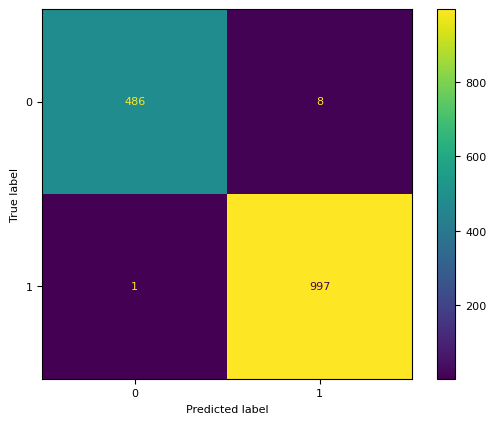

In [97]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf3.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf3.classes_, 
                             )
disp.plot(values_format='');

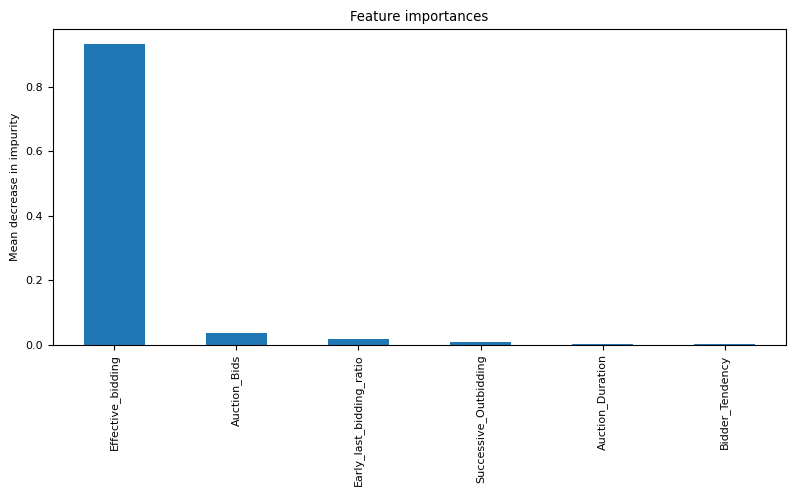

In [98]:
#Use the feature_importances_ attribute of the best estimator object to inspect the features of your final model.

importances = rf3.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();

The random forest of the clustered data yielded different results were compared to that of the original data. This difference could be as a result of both models predicting different outcomes. POssible outcome predicted in the clustered model is likely concentrated on the number of bids by shill bidders as metrics like effective bidding, auction bids are more related to number of bids and bidding activitirs

## Using the data related to eBay auctions, perform two regression analysis to predict the final auction prices based on features that you consider relevant. You must explain your choice. Compare the  regression models and justify which model better predicts auction outcomes. Discuss theimplications of your findings for eBay’s auction strategy

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Using simple linear regression

In [100]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Starting_Price         1000 non-null   float64
 1   Number_of_Bidders      1000 non-null   int64  
 2   Auction_Duration_Days  1000 non-null   int64  
 3   Bidder_Activity        1000 non-null   float64
 4   Final_Price            1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [101]:
ebay_df.head()

,Starting_Price,Number_of_Bidders,Auction_Duration_Days,Bidder_Activity,Final_Price
0,55.33,18,2,2.450,60.73
1,71.80,7,11,0.827,94.44
2,60.67,11,9,3.244,87.54
3,54.94,6,14,2.058,67.31
4,42.94,5,11,2.057,59.19


C:\Users\zoice\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zoice\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zoice\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zoice\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

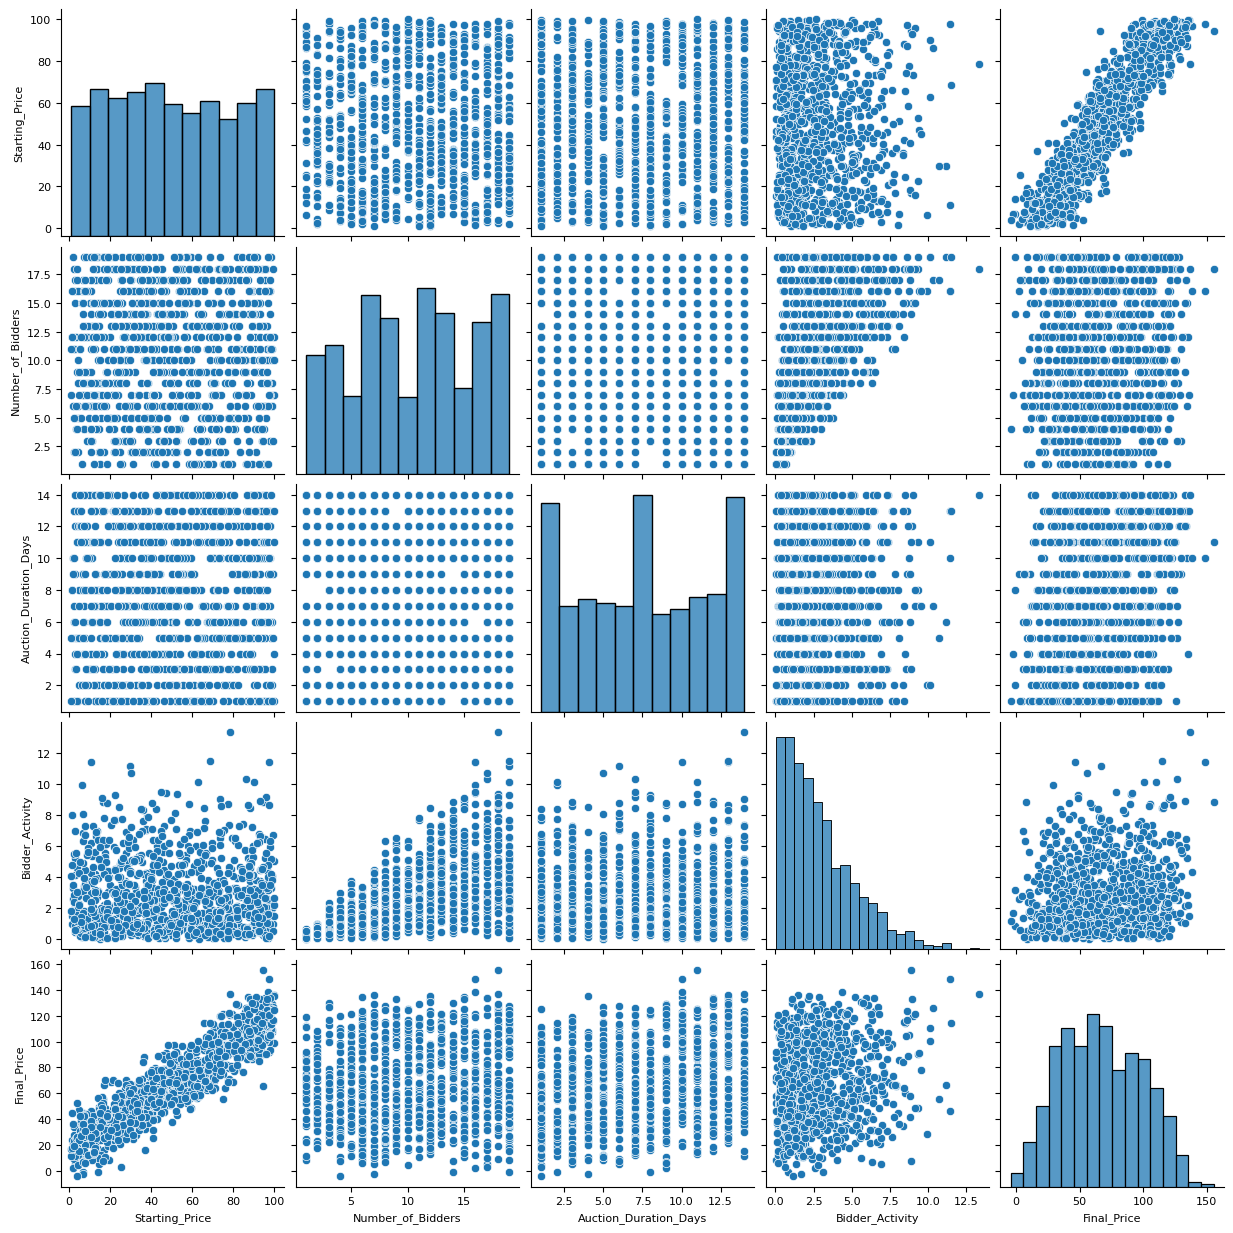

In [102]:
#create a scatterplot matrix
sns.pairplot(ebay_df)

# Model asssumptions
1. starting price and final price seem to be linearly correlated meeting the linearity assumption
2. Starting price and final price also seem to be normally distributed meeting the Normality assumption
3. since all rows is a different record of a particular bid, wee have no reason to believe that a particular record affect another, meeting the independent observation assumption

In [103]:
#isolate the starting price and final price column
ols_data = ebay_df[["Starting_Price", "Final_Price"]]
ols_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Starting_Price  1000 non-null   float64
 1   Final_Price     1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [104]:
ols_data.head()

,Starting_Price,Final_Price
0,55.33,60.73
1,71.80,94.44
2,60.67,87.54
3,54.94,67.31
4,42.94,59.19


In [108]:
ols_formula = "Final_Price ~ Starting_Price"

In [109]:
#import ols function

from statsmodels.formula.api import ols

In [110]:
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [111]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     4935.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        09:58:48   Log-Likelihood:                -3983.6
No. Observations:                1000   AIC:                             7971.
Df Residuals:                     998   BIC:                             7981.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.9429      0.826     20.510      0.000      15.322      18.564
Starting_Price     1.0045      0.014     70.250      0.000       0.976       1.033
==============================================================================
Omnibus:                        1.717   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.424   Jarque-Bera (JB):                1.711
Skew:                           0.101   Prob(JB):                        0.425
Kurtosis:                       2.984   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#using linear regression formula

y = intercept + slope * X

Final_price = 16.9429 + 1.0045 * Starting_Price

The linear regression formula states that every one unit increase in the starting price would lead to 1.0045 units increase in the final price

In [ ]:
#checking if model meet the homoscedescity assumption

In [113]:
residuals = model.resid

In [114]:
fitted_values = model.fittedvalues

<Axes: xlabel='Starting_Price', ylabel='Final_Price'>

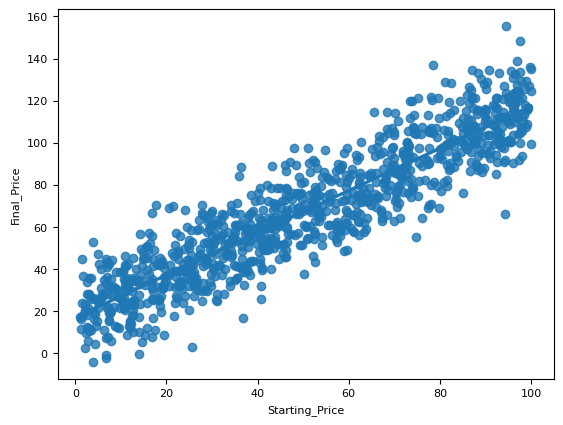

In [115]:
sns.regplot (x="Starting_Price", y="Final_Price", data= ols_data)

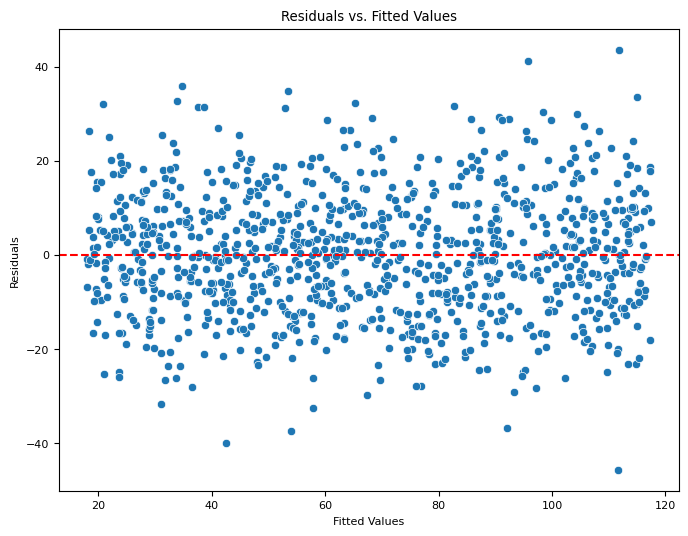

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)  # Specify x and y separately
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

In [ ]:
#randomnly spaced residuals shows that the homoscedescity assumption is met

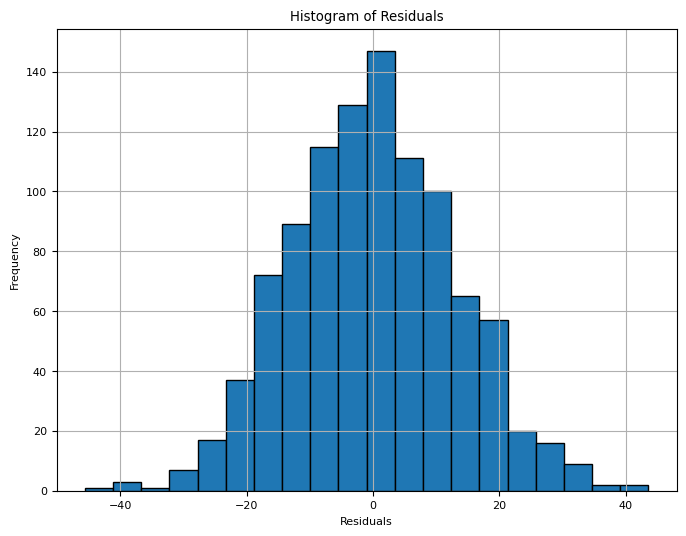

In [117]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

In [ ]:
#The historgram of residuals is normally distributed

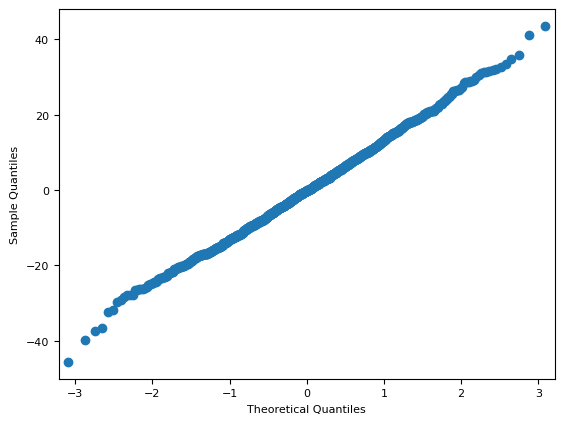

In [118]:
import statsmodels.api as sm

fig = sm.qqplot(model.resid)
plt.show()

# Using multiple linear regression

# The data meets the assumption of multicollinearity as no too predictor columns are correlated in the pairplot displayed in the previous model

In [119]:
ebay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Starting_Price         1000 non-null   float64
 1   Number_of_Bidders      1000 non-null   int64  
 2   Auction_Duration_Days  1000 non-null   int64  
 3   Bidder_Activity        1000 non-null   float64
 4   Final_Price            1000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


In [120]:
# Isolate target variable (y)
y = ebay_df['Final_Price']

# Isolate the features (X)
X = ebay_df.drop('Final_Price', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
X.head()

,Starting_Price,Number_of_Bidders,Auction_Duration_Days,Bidder_Activity
0,55.33,18,2,2.450
1,71.80,7,11,0.827
2,60.67,11,9,3.244
3,54.94,6,14,2.058
4,42.94,5,11,2.057


In [122]:
y.head()

0    60.73
1    94.44
2    87.54
3    67.31
4    59.19
Name: Final_Price, dtype: float64

In [123]:
ols_formula = "Final_Price ~ Starting_Price + Number_of_Bidders + Auction_Duration_Days + Bidder_Activity"

In [124]:
ols_data = pd.concat([X_train, y_train], axis = 1)

In [125]:
ols_data.head()

,Starting_Price,Number_of_Bidders,Auction_Duration_Days,Bidder_Activity,Final_Price
541,65.07,14,7,6.068,96.91
440,36.69,2,3,0.694,38.69
482,16.08,6,8,1.845,56.85
422,41.50,11,7,2.443,49.06
778,78.04,5,13,0.945,105.28


In [126]:
OLS = ols(formula = ols_formula, data = ols_data)

In [127]:
model = OLS.fit()

In [128]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1555.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        10:00:46   Log-Likelihood:                -2617.0
No. Observations:                 700   AIC:                             5244.
Df Residuals:                     695   BIC:                             5267.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0946      1.250      0.076      0.940      -2.360       2.549
Starting_Price            0.9836      0.013     74.059      0.000       0.958       1.010
Number_of_Bidders      1.689e-05      0.089      0.000      1.000      -0.175       0.175
Auction_Duration_Days     1.5575      0.097     16.064      0.000       1.367       1.748
Bidder_Activity           2.1611      0.204     10.599      0.000       1.761       2.561
==============================================================================
Omnibus:                        1.087   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.924
Skew:                          -0.065   Prob(JB):                        0.630
Kurtosis:                       3.121   Cond. No.                         192.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#The intercept is 0.0946, indicating that if all the other predictors are 0, the final price or winning bid amount wiil be approximately 0.0946.However this is not statistically significant as we have a p value of more than 0.05,this indidcates that the expected winning bid is not significally different from 0 when other predictors are 0.

We expect the value of the final price to increase byy 0.9836 for every 1 unit increase in the starting price, while we expect the final price to increase by 1.5575 days and 2.1611 for every one unit increase in Auction duration days and Bidder activity respectively. Starting price, Action Duration days and Bidder activity are statistically significant. Number of bidders is statistically insignificant and would yield only a verry small increase in final price ((1.689e-05)

The multiple regression model better predicts the auction outcome as it takes into consideration more factors that may suggest fraudulent behaviour. The starting price alone can not predict shill bidding or the final price of an auction

The implications of our findings are as follows
1. The nuumber of bidders alone may not neccessarily increase the final price or indicate a shill behaviour. Ebay should focus less on the total number of bidders and more on the bidding activity. Successive bidding as explained in our shill bidding dataset could indicate potential shill behavior, which can distort auction outcomes.
2. Implement measures to detect and prevent shill bidding, such as monitoring bid frequency and bidder activity to ensure fair and transparent auctions.
3. Optimize auction durations to minimize opportunities for shill bidding. Shorter auction durations may reduce the likelihood of manipulative bidding tactics.
4. Put measures in place to prevent successive bidding.